<a href="https://colab.research.google.com/github/HawonCP3/Class2022Spring/blob/main/20220425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Auto Correlation (Serial Correlation) 자기상관

time-series data를 다룰 때 현재의 신호가 임의의 시간만큼 지연된 신호와 높은 상관관계가 있다면 auto correlation이 있다고 봄. 

{X(t)}의 시간차 t인 두 시점 - t1, t1+1이라 가정하면 표본값 곱의 집합 평균 Y(t1, t1+1) = E(X(t1) X(t1+t)) => {X(t)}의 autocorrelation function



자기상관 분석 - 반복되는 패턴을 찾기 위한 목적



pandas의 series로 autocorrelation 간접 구현

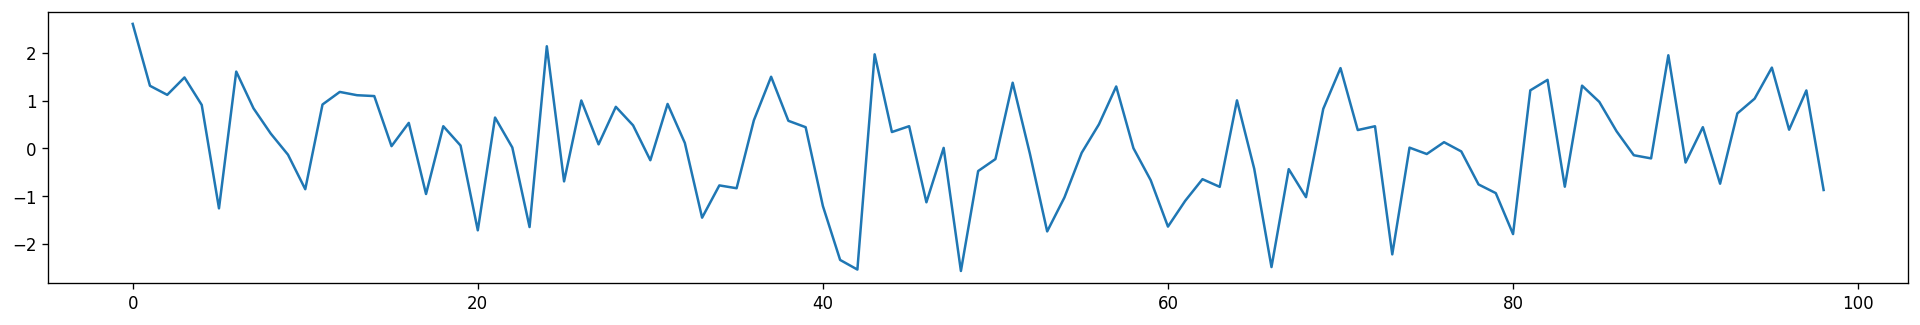

0.16133006015343762

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 난수 생성, series를 이용하여 임의의 time-series data 생성
np.random.seed(0)
s = pd.Series(np.sin(range(1,100))) + pd.Series(np.random.randn(99)) 

plt.figure(facecolor='w',figsize=(20,3),dpi=120)
plt.plot(s)
plt.show() # plotting하여 시각화

s.autocorr(lag=1) # lag 1에 해당하는 autocorrelation을 리턴

Root Mean Square (quadratic mean) 제곱평균제곱근

변화하는 값의 크기에 관한 통계적 척도, 사인함수에서 변수들이 -+값을 오고 갈 때 유용함.

변수의 제곱에 대한 평균의 제곱근

데이터 [1, 3, 5, 7, 9]가 주어졌을 때

1. 변수의 값의 제곱을 구함 -> 1, 9, 25, 49, 81

2. 제곱한 값의 평균을 구함 -> (1 + 9 + 25 + 49 + 81)/5 = 33

3. 구한 평균값에 제곱근을 붙임 -> √33 = 5.745... = RMS


Root Mean Square Error (Root Mean Square Deviation) 평균제곱근오차/편차

추정 모델이 예측한 값과 실제 값의 차이를 다룰 때 사용하는 측도, 정밀도 표현에 적합함.

잔차(예측 오차)의 표준 편차, 잔차 - regression data point에서 얼마나 멀리 떨어져 있는지 측정, RMSE - 이 잔차의 분산 정도를 측정 => 데이터가 가장 적합한 선 주위에 얼마나 집중되어 있는 지의 정도를 알아냄

Text(0, 0.5, 'y')

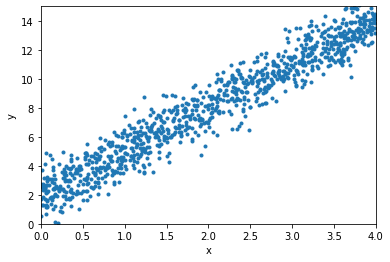

In [44]:
import matplotlib.pyplot as plt
import numpy as np

X = 4 * np.random.rand(1000,1)
X_b = np.c_[np.ones((1000,1)), X]

Y = 2 + 3 * X + np.random.randn(1000,1)

plt.plot(X,Y,'.')

plt.xlim(0,4)
plt.ylim(0,15)

plt.xlabel(r'x')
plt.ylabel(r'y')


In [47]:

theta = np.array([[-1.4],[5.0]])

X_new = np.array([[0],[4]])
X_new_b = np.c_[np.ones((2,1)), X_new]

plt.plot(X_new, X_new_b.dot( theta ), '-')

plt.xlim(0,4)
plt.ylim(0,15)

plt.xlabel(r'x')
plt.ylabel(r'y')

plt.close()


In [36]:
Y_predict = X_b.dot( theta )

print(Y_predict.shape, X_b.shape, theta.shape)

mse = np.sum( (Y_predict-Y)**2 ) / 1000.0

print('mse: ', mse)

(1000, 1) (1000, 2) (2, 1)
mse:  6.637273356778461


In [17]:
from sklearn.metrics import mean_squared_error

print('mse (sklearn): ', mean_squared_error(Y,Y_predict))

mse (sklearn):  6.920833714053336
